In [1]:
# مصطفى أنور محمد قناوي
# محمود علي عاشور
# محمود رجب مهدي 
# أحمد سعد عبد العزيز
# محمد راضي عبد القادر

In [2]:
%matplotlib inline

import matplotlib
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import warnings

In [3]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = 15 , 15
plt.rcParams['figure.facecolor'] = 'white'
UNDERLINE = '\033[4m'
END = '\033[0m'

warnings.simplefilter("ignore")

In [4]:
football = nx.read_gml('football.gml')

In [5]:
print(nx.is_directed(football))

False


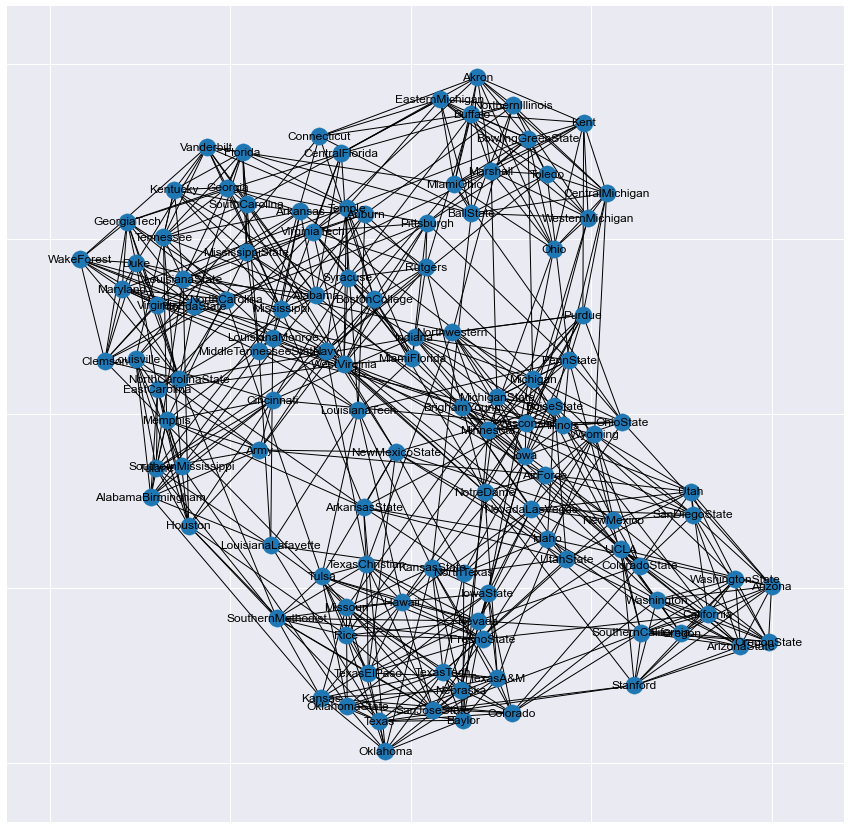

In [6]:
pos = nx.draw_networkx(football)

In [7]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)

In [8]:
def find_degree(G):
   return dict(G.degree())

degree = {
  'football':find_degree(nfootball)
}

def degree_hist(G_degree):
  return plt.hist(list(G_degree.values()),sorted(set(G_degree.values())), rwidth=0.5, align="left")

mean_degree = {
  'football':np.mean(list(degree['football'].values()))
}

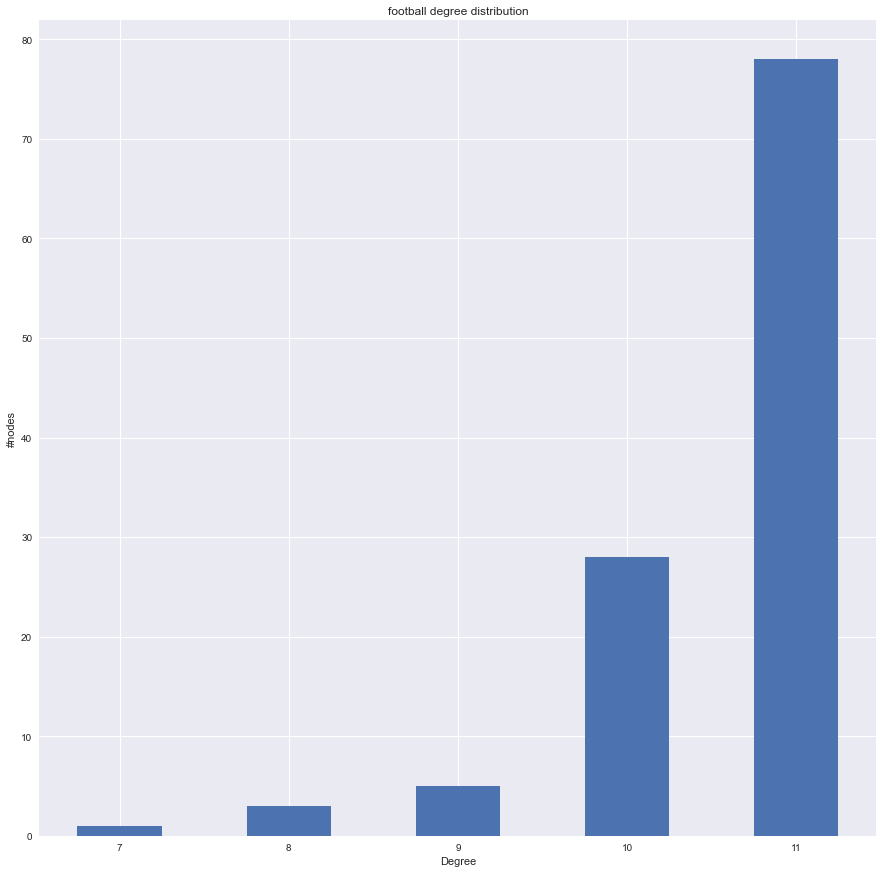

In [9]:
for key in degree.keys():
  plt.figure()
  plt.title(key+" degree distribution")
  plt.xlabel("Degree")
  plt.ylabel("#nodes")
  degree_hist(degree[key])

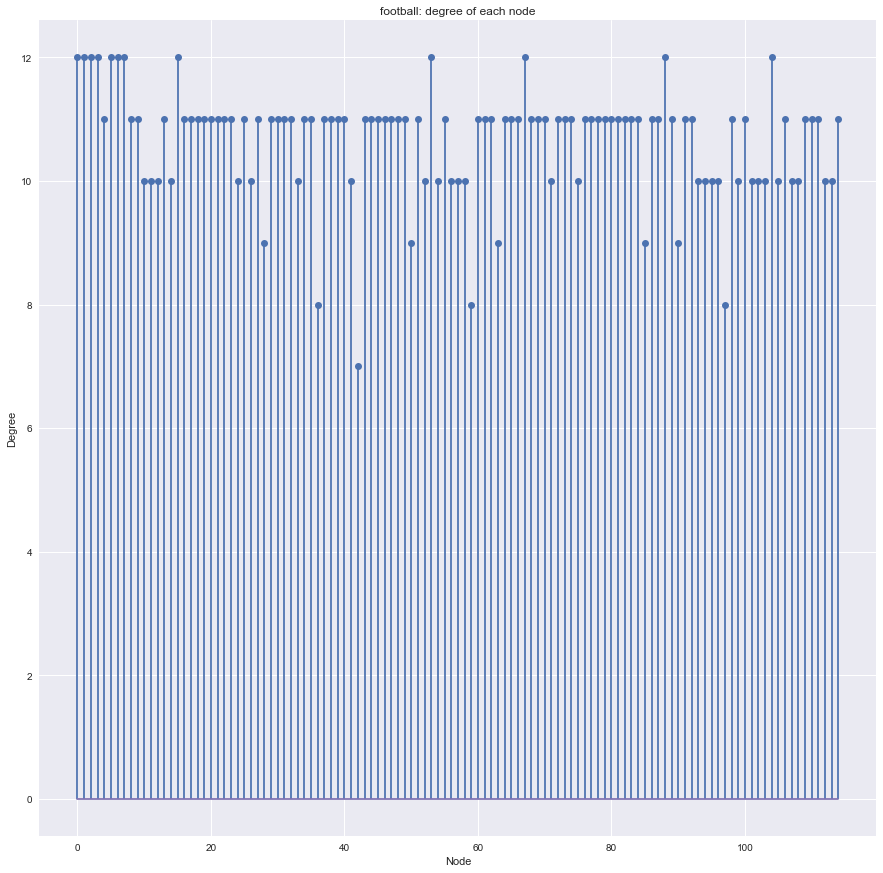

In [10]:
for key in degree.keys():
  plt.figure()
  plt.title(key+": degree of each node")
  plt.xlabel("Node")
  plt.ylabel("Degree")
  plt.stem(degree[key].keys(), degree[key].values())

In [11]:
for key in mean_degree.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = mean_degree[key]
  print("The average degree is: %f" %mean)

football network:
The average degree is: 10.660870


In [12]:
def clust_coef(G):
  return nx.clustering(G)

cc = {
  'football':clust_coef(nfootball)
}


def cc_hist(G_cc):
  return plt.hist(list(G_cc.values()),sorted(set(G_cc.values())), rwidth=0.5, align="left")

mean_cc = {
  'football':np.mean(list(cc['football'].values()))
}

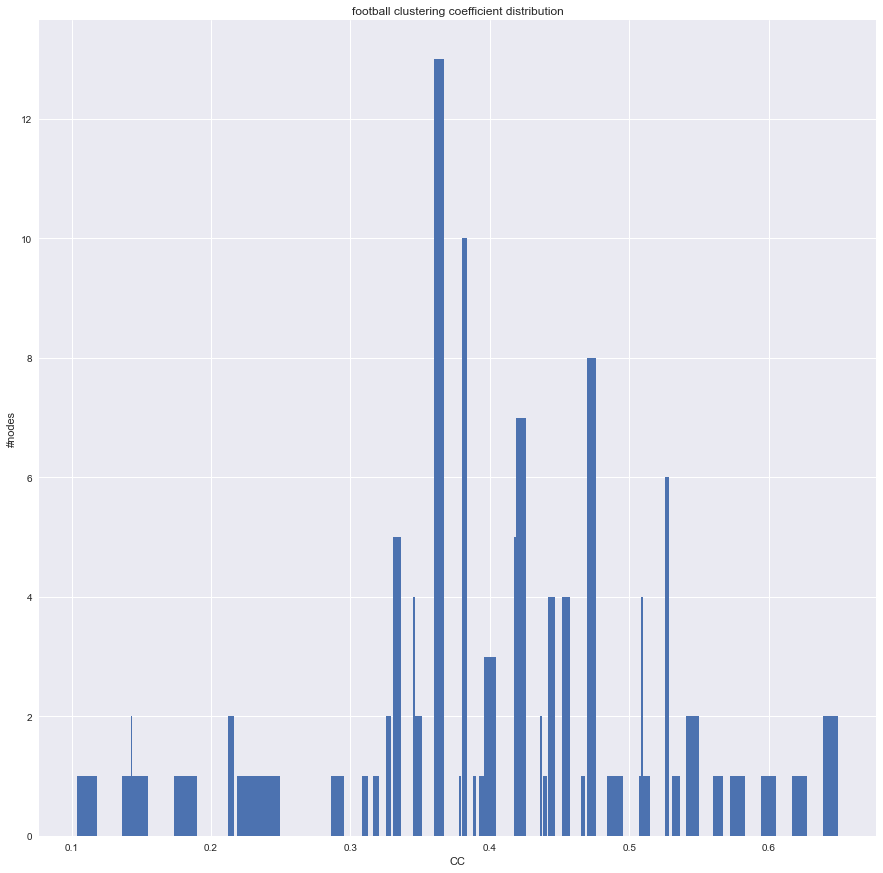

In [13]:
for key in cc.keys():
  plt.figure()
  plt.title(key+" clustering coefficient distribution")
  plt.xlabel("CC")
  plt.ylabel("#nodes")
  degree_hist(cc[key])

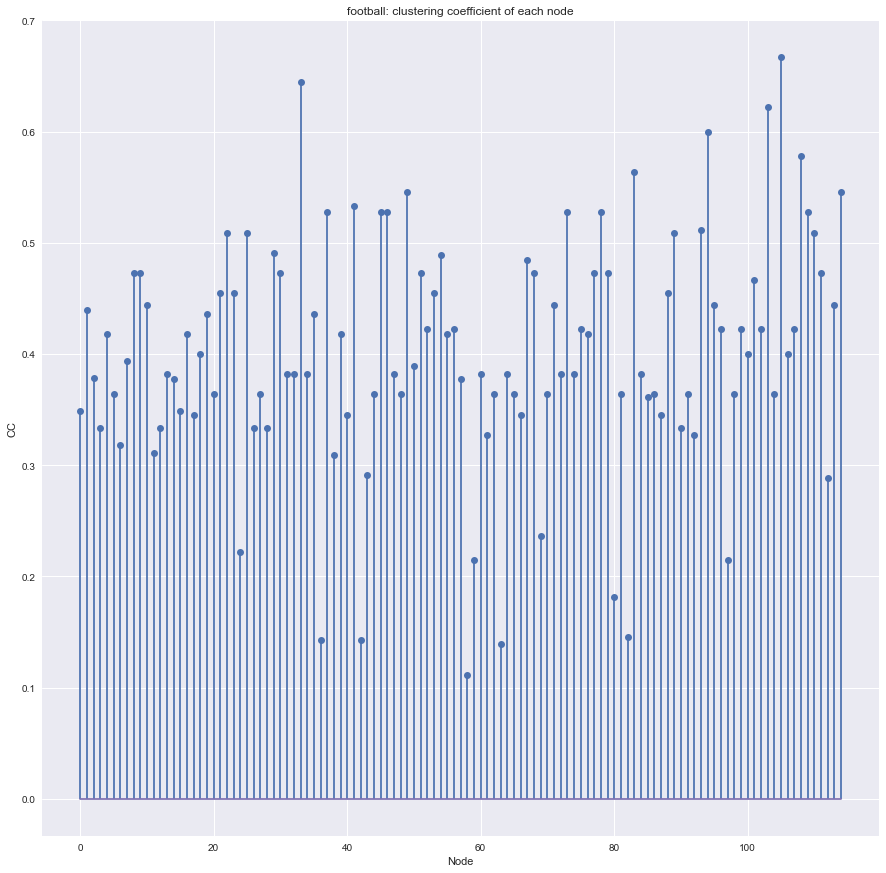

In [14]:
for key in cc.keys():
  plt.figure()
  plt.title(key+": clustering coefficient of each node")
  plt.xlabel("Node")
  plt.ylabel("CC")
  plt.stem(cc[key].keys(), cc[key].values())

In [15]:
for key in mean_cc.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = mean_cc[key]
  print("The average clustering coefficient is: %f" %mean)

football network:
The average clustering coefficient is: 0.403216


In [16]:
def ego_centrality(G):
  ego_centr = dict()

  for i in range (0,len(G)):
    ego_net = nx.ego_graph(G,i)
    A = nx.adjacency_matrix(ego_net).todense()
    ones = np.ones(A.shape)
    A_sq = np.linalg.matrix_power(A,2)
    A_ego = np.multiply(A_sq, ones - A)
    A_ego = np.triu(A_ego,1)
    A_ego = A_ego[np.nonzero(A_ego)]
    A_ego = 1/A_ego
    ego_centr[i] = np.sum(A_ego)

  return ego_centr

ebtw = {
  'football':ego_centrality(nfootball)
}

def egobtw_hist(G_ebtw): 
  return plt.hist(list(G_ebtw.values()),sorted(set(G_ebtw.values())), rwidth=0.5, align="left")

mean_ebtw = {
  'football':np.mean(list(ebtw['football'].values()))
}

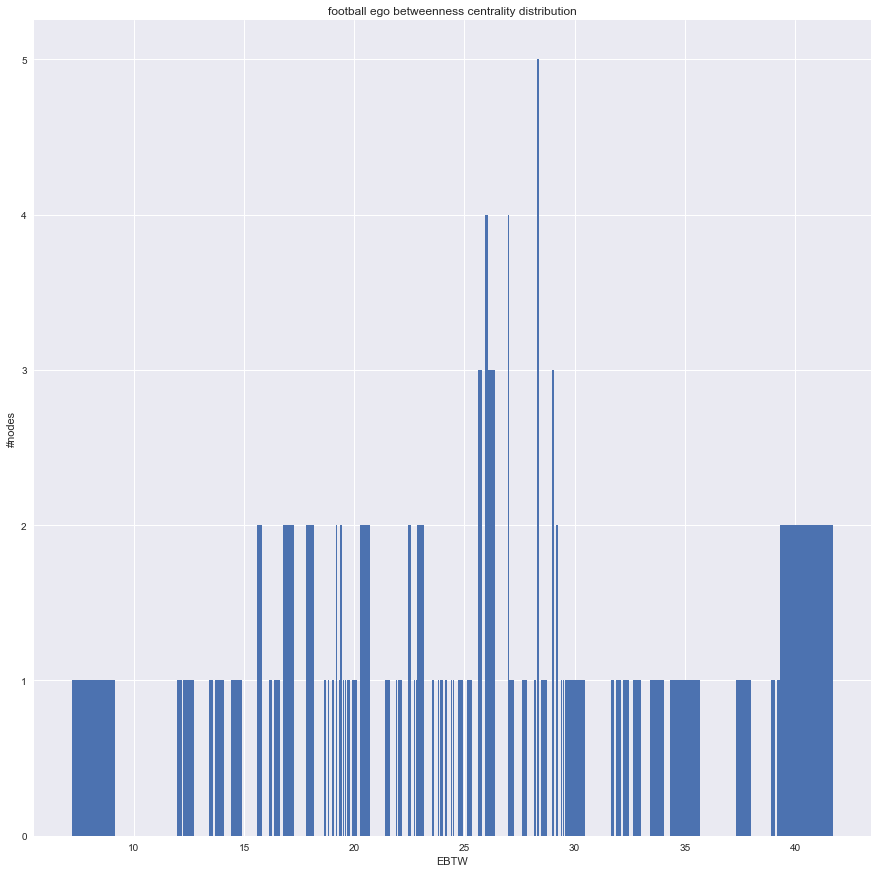

In [17]:
for key in ebtw.keys():
  plt.figure()
  plt.title(key+" ego betweenness centrality distribution")
  plt.xlabel("EBTW")
  plt.ylabel("#nodes")
  degree_hist(ebtw[key])

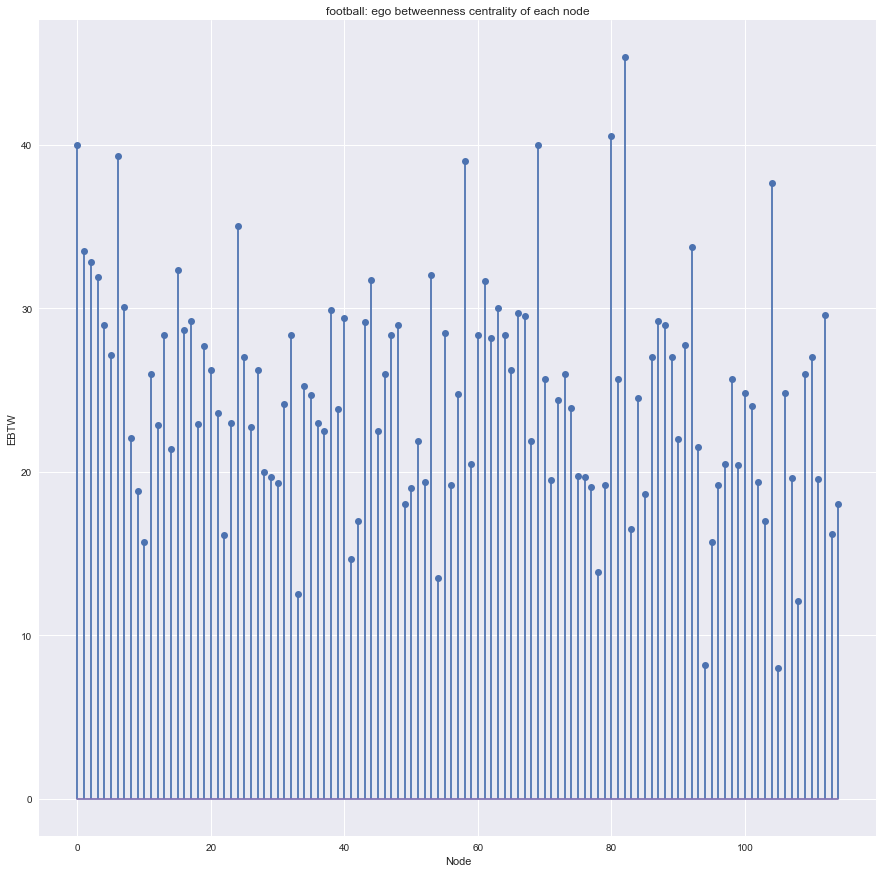

In [18]:
for key in ebtw.keys():
  plt.figure()
  plt.title(key+": ego betweenness centrality of each node")
  plt.xlabel("Node")
  plt.ylabel("EBTW")
  plt.stem(ebtw[key].keys(), ebtw[key].values())

In [19]:
for key in mean_ebtw.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = mean_ebtw[key]
  print("The average ego betweenness centrality is: %f" %mean)

football network:
The average ego betweenness centrality is: 24.722133


In [20]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [21]:
from itertools import takewhile
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_GN(G,k):
  best = 0
  best_coms = None
  comp = nx.algorithms.community.centrality.girvan_newman(G)   
  limited = takewhile(lambda c: len(c) <= k, comp)
  for communities in limited:
    com  = tuple(sorted(c) for c in communities) 
    mod = nx.algorithms.community.quality.modularity(G,com)
    if mod>best:
      best = mod
      best_coms = com
  return best_coms


In [22]:
GN_coms = {
    'football':comd_GN(nfootball,50)
}

In [23]:
pos = {
  'football':nx.fruchterman_reingold_layout(nfootball)
}

In [24]:
def visual_com(G,nodelist, pos):
  nx.draw_networkx_edges(G, pos=pos)
  for (nodes,i) in zip(nodelist,range(len(nodelist))):
    nx.draw_networkx_nodes(G, pos=pos ,nodelist=nodes ,node_color=colors[i])

In [25]:
def subplots(G,G_name):
  gs = gridspec.GridSpec(2, 2)
  fig = plt.figure(figsize=(20,15))
  ax1 = fig.add_subplot(gs[0, 0])
  visual_com(G,GN_coms[G_name], pos[G_name])
  ax1.set_title('Newman-Girvan')
  plt.show()


In [26]:
def print_mods(G, G_name):
  print("Girvan-Newman: %f" %nx.algorithms.community.quality.modularity(G,GN_coms[G_name]))

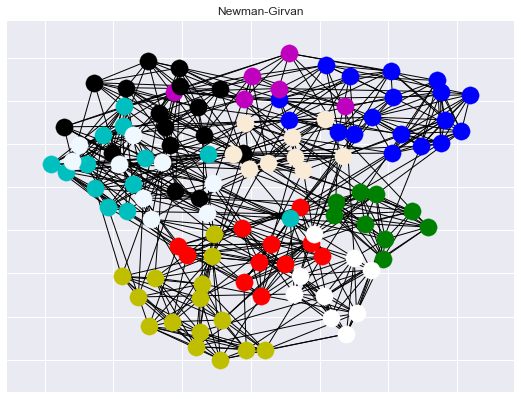

In [27]:
subplots(nfootball,'football')

In [28]:
print(UNDERLINE+"Modularities for American College Football Graph"+END)
print_mods(nfootball,'football')

Modularities for American College Football Graph
Girvan-Newman: 0.599629


In [29]:
nx.to_numpy_matrix(football)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
print(nx.adjacency_matrix(football).todense())

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
